In [1]:
import os
import json
from pprint import pprint
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import log, sqrt
from datetime import datetime

DATA_DIR = os.path.join('data','boxofficemojo')

In [50]:
# read boxoffice data
movie_list = []
for target_file_name in os.listdir(DATA_DIR):
    target_file_path = os.path.join(DATA_DIR, target_file_name)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
        movie_list.append(movie)
        
movies = pd.DataFrame(movie_list)
print str(len(movies)) + " movies read\n"
movies.head()

3728 movies read



,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",3454,269784201,2008
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,2704,183611771,2000
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,2311,53478166,1999
3,10 Years (2012),Jamie Linden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,63,203373,2012
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,2,NaN,2013


In [42]:
# check data types and non-missing count
print movies.dtypes
print "\n"
print movies.count()

alt_title                object
director                 object
domestic_gross          float64
mojo_slug                object
opening_per_theater     float64
opening_weekend_take    float64
production_budget       float64
release_date_limited     object
release_date_wide        object
title                    object
widest_release          float64
worldwide_gross         float64
year                    float64
dtype: object


alt_title               3728
director                2172
domestic_gross          3653
mojo_slug               3728
opening_per_theater     3548
opening_weekend_take    3548
production_budget       1591
release_date_limited     293
release_date_wide       3718
title                   3728
widest_release          3576
worldwide_gross         2821
year                    3721
dtype: int64


In [43]:
# numeric variable distributions
movies.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year
count,3.653000e+03,3548.000000,3.548000e+03,1.591000e+03,3576.000000,2.821000e+03,3721.000000
mean,3.587710e+07,7769.070744,8.919290e+06,4.594223e+07,1359.910794,9.117943e+07,2004.740124
std,5.660351e+07,8251.101404,1.403204e+07,4.056849e+07,1293.817347,1.489563e+08,9.127232
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1933.000000
25%,6.353250e+05,3212.000000,4.748775e+04,1.675000e+07,52.000000,5.710236e+06,2001.000000
50%,1.323532e+07,5520.500000,3.334686e+06,3.500000e+07,1074.500000,3.554776e+07,2007.000000
75%,4.966253e+07,9463.500000,1.268750e+07,6.500000e+07,2584.250000,1.166729e+08,2011.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000


In [51]:
# add season flag
movies['release_date_wide'] = pd.to_datetime(movies['release_date_wide'])
movies['release_mth'] = movies['release_date_wide'].apply(lambda x: x.month)
dummies_mth = pd.get_dummies(movies['release_mth'], prefix='dummy_release_mth').ix[:,1:]
movies = pd.concat([movies,dummies_mth],axis=1)
movies.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,...,dummy_release_mth_3.0,dummy_release_mth_4.0,dummy_release_mth_5.0,dummy_release_mth_6.0,dummy_release_mth_7.0,dummy_release_mth_8.0,dummy_release_mth_9.0,dummy_release_mth_10.0,dummy_release_mth_11.0,dummy_release_mth_12.0
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",...,1,0,0,0,0,0,0,0,0,0
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,...,0,0,0,0,0,0,0,0,1,0
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,...,1,0,0,0,0,0,0,0,0,0
3,10 Years (2012),Jamie Linden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,...,0,0,0,0,0,0,1,0,0,0
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# movie directors
print str(len(movies.director.value_counts())) + " total directors\n"
print movies.director.value_counts()
print "\n"
print movies.director.value_counts().describe()

851 total directors

Steven Spielberg                  19
Woody Allen                       19
Ridley Scott                      15
Joel Schumacher                   15
Steven Soderbergh                 14
Clint Eastwood                    14
Tim Burton                        12
Martin Scorsese                   11
Dennis Dugan                      11
Richard Linklater                 11
Roland Emmerich                   10
Richard Donner                    10
Wes Craven                        10
Ron Howard                        10
Joel Coen                          9
Oliver Stone                       9
Michael Mann                       9
Peter Weir                         9
Tyler Perry                        9
Stephen Frears                     9
Robert Zemeckis                    9
Brian De Palma                     9
James Cameron                      8
Mike Nichols                       8
Frank Oz                           8
Pedro Almodovar                    8
Gus Van Sant     

In [52]:
# clean up director name
import re
movies['director_org'] = movies['director']
movies['director'] = map(lambda x: x if x is None else re.sub(r"\W","", x.lower()), movies['director_org'])
print str(len(movies.director.value_counts())) + " total directors - CLEANED\n"

# create dummies for top directors
dir_count = movies['director'].value_counts()
mask = movies['director'].isin(dir_count[dir_count >= 5].index)
movies['director_common'] = mask
movies['director_common'] = movies.apply(lambda r: r['director'] if r['director_common'] else np.nan, axis=1)
dummies_common_directors = pd.get_dummies(movies['director_common'], prefix="dummy_director_common").ix[:,1:]
print str(dummies_common_directors.shape[1]) + " total dummy variables for common directors\n"

movies = pd.concat([movies,dummies_common_directors],axis=1)
movies.head()

851 total directors - CLEANED

131 total dummy variables for common directors



,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,...,dummy_director_common_tomshadyac,dummy_director_common_tonyscott,dummy_director_common_tylerperry,dummy_director_common_uweboll,dummy_director_common_walterhill,dummy_director_common_wernerherzog,dummy_director_common_wesanderson,dummy_director_common_wescraven,dummy_director_common_wolfgangpetersen,dummy_director_common_woodyallen
0,"10,000 B.C. (2008)",rolandemmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",...,0,0,0,0,0,0,0,0,0,0
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,...,0,0,0,0,0,0,0,0,0,0
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,...,0,0,0,0,0,0,0,0,0,0
3,10 Years (2012),jamielinden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,...,0,0,0,0,0,0,0,0,0,0
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,...,0,0,0,0,0,0,0,0,0,0


2425 out of 3728 movies have oversea sales


count    2.425000e+03
mean     5.650152e+07
std      9.897702e+07
min      4.720000e+02
25%      4.693543e+06
50%      2.106382e+07
75%      6.871652e+07
max      2.027457e+09
Name: oversea_gross, dtype: float64

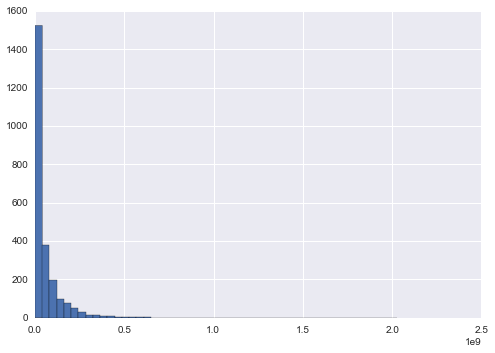

In [53]:
# derive dependent variable(oversea_gross)
movies['oversea_gross'] = movies['worldwide_gross'] - movies['domestic_gross']
oversea = movies[movies['oversea_gross']>0]
print "{0} out of {1} movies have oversea sales".format(len(oversea), len(movies))
oversea['oversea_gross'].hist(bins=50)
oversea['oversea_gross'].describe()

In [54]:
# fit linear model 
import statsmodels.api as sm

df = oversea.copy()

y_col = 'oversea_gross'
x_cols = ['domestic_gross','opening_per_theater','opening_weekend_take','production_budget', 'widest_release']
dummy_cols = filter(lambda x: x.startswith("dummy_"), df.columns)
x_cols.extend(dummy_cols)

df_model = df[x_cols + [y_col]].dropna()

Y = df_model[y_col] 
X = sm.add_constant(df_model[x_cols])
linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          oversea_gross   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     51.79
Date:                Fri, 16 Oct 2015   Prob (F-statistic):               0.00
Time:                        13:04:40   Log-Likelihood:                -27242.
No. Observations:                1422   AIC:                         5.477e+04
Df Residuals:                    1281   BIC:                         5.551e+04
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
domestic_gross                                   1.1384      0.041     27.632      0.000         1.058     1.219
opening_per_theater                           -199.2606    276.826     -0.720      0.472      -742.342   343.821
opening_weekend_take                            -0.0759      0.193     -0.393      0.695        -0.455     0.303
production_budget                                0.7823      0.052     15.101      0.000         0.681     0.884
widest_release                               -1.344e+04   1916.529     -7.013      0.000     -1.72e+04 -9680.020
dummy_release_mth_2.0                         3.639e+05   6.92e+06      0.053      0.958     -1.32e+07  1.39e+07
dummy_release_mth_3.0                        -1.149e+07   6.39e+06     -1.797      0.073      -2.4e+07  1.06e+06
dummy_release_mth_4.0                         1.758e+06   6.44e+06      0.273      0.785     -1.09e+07  1.44e+07
dummy_release_mth_5.0                         1.582e+07   7.18e+06      2.202      0.028      1.72e+06  2.99e+07
dummy_release_mth_6.0                        -8.051e+06   6.56e+06     -1.227      0.220     -2.09e+07  4.82e+06
dummy_release_mth_7.0                        -1.129e+06   6.67e+06     -0.169      0.866     -1.42e+07   1.2e+07
dummy_release_mth_8.0                        -8.315e+06   6.37e+06     -1.305      0.192     -2.08e+07  4.18e+06
dummy_release_mth_9.0                         2.609e+05   6.59e+06      0.040      0.968     -1.27e+07  1.32e+07
dummy_release_mth_10.0                        3.645e+06   6.03e+06      0.604      0.546     -8.19e+06  1.55e+07
dummy_release_mth_11.0                       -5.876e+05   6.75e+06     -0.087      0.931     -1.38e+07  1.27e+07
dummy_release_mth_12.0                        2.097e+05   6.51e+06      0.032      0.974     -1.26e+07   1.3e+07
dummy_director_common_alejandrogonzlezirritu  2.292e+07   5.41e+07      0.423      0.672     -8.33e+07  1.29e+08
dummy_director_common_andrewdavis            -4.428e+07   3.79e+07     -1.169      0.243     -1.19e+08  3.01e+07
dummy_director_common_andyfickman            -1.143e+06    3.1e+07     -0.037      0.971     -6.19e+07  5.96e+07
dummy_director_common_andylanawachowski       3.299e+07   2.43e+07      1.360      0.174     -1.46e+07  8.06e+07
dummy_director_common_andytennant            -2.532e+07   2.41e+07     -1.053      0.293     -7.25e+07  2.19e+07
dummy_director_common_anglee                  3.745e+07    2.4e+07      1.561      0.119     -9.62e+06  8.45e+07
dummy_director_common_antoinefuqua           -5.367e+06   2.21e+07     -0.243      0.808     -4.87e+07   3.8e+07
dummy_director_common_barrylevinson          -1.256e+07   3.79e+07     -0.331      0.741      -8.7e+07  6.19e+07
dummy_director_common_bettythoma

In [55]:
# fit 2nd model: remove widest_release, opening_per_theater, opening_weekend_take
y_col = 'oversea_gross'
x_cols = ['domestic_gross','production_budget']
dummy_cols = filter(lambda x: x.startswith("dummy_"), df.columns)
x_cols.extend(dummy_cols)

df_model = df[x_cols + [y_col]].dropna()

Y = df_model[y_col] 
X = sm.add_constant(df_model[x_cols])
linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          oversea_gross   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     50.46
Date:                Fri, 16 Oct 2015   Prob (F-statistic):               0.00
Time:                        13:13:56   Log-Likelihood:                -27350.
No. Observations:                1426   AIC:                         5.498e+04
Df Residuals:                    1288   BIC:                         5.570e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
domestic_gross                                   1.0359      0.026     39.496      0.000         0.984     1.087
production_budget                                0.5901      0.045     13.205      0.000         0.502     0.678
dummy_release_mth_2.0                        -2.116e+07   6.15e+06     -3.442      0.001     -3.32e+07  -9.1e+06
dummy_release_mth_3.0                        -3.248e+07   5.46e+06     -5.945      0.000     -4.32e+07 -2.18e+07
dummy_release_mth_4.0                        -2.027e+07   5.46e+06     -3.710      0.000      -3.1e+07 -9.55e+06
dummy_release_mth_5.0                        -9.207e+05   6.62e+06     -0.139      0.889     -1.39e+07  1.21e+07
dummy_release_mth_6.0                        -2.494e+07   5.81e+06     -4.295      0.000     -3.63e+07 -1.35e+07
dummy_release_mth_7.0                        -1.929e+07   5.92e+06     -3.258      0.001     -3.09e+07 -7.68e+06
dummy_release_mth_8.0                        -2.941e+07   5.49e+06     -5.352      0.000     -4.02e+07 -1.86e+07
dummy_release_mth_9.0                        -2.191e+07   5.63e+06     -3.891      0.000      -3.3e+07 -1.09e+07
dummy_release_mth_10.0                       -1.725e+07   5.06e+06     -3.410      0.001     -2.72e+07 -7.33e+06
dummy_release_mth_11.0                       -1.922e+07   5.91e+06     -3.250      0.001     -3.08e+07 -7.62e+06
dummy_release_mth_12.0                       -1.477e+07   5.51e+06     -2.679      0.007     -2.56e+07 -3.95e+06
dummy_director_common_alejandrogonzlezirritu  3.468e+07   5.47e+07      0.634      0.526     -7.26e+07  1.42e+08
dummy_director_common_andrewdavis            -4.479e+07   3.87e+07     -1.158      0.247     -1.21e+08  3.11e+07
dummy_director_common_andyfickman            -1.285e+07   3.16e+07     -0.407      0.684     -7.48e+07  4.91e+07
dummy_director_common_andylanawachowski       4.059e+07   2.47e+07      1.640      0.101     -7.96e+06  8.91e+07
dummy_director_common_andytennant            -2.807e+07   2.45e+07     -1.143      0.253     -7.62e+07  2.01e+07
dummy_director_common_anglee                  3.465e+07   2.44e+07      1.418      0.157     -1.33e+07  8.26e+07
dummy_director_common_antoinefuqua           -6.997e+06   2.25e+07     -0.310      0.756     -5.12e+07  3.72e+07
dummy_director_common_barrylevinson          -6.693e+06   3.87e+07     -0.173      0.863     -8.25e+07  6.91e+07
dummy_director_common_bettythomas            -2.142e+07   3.16e+07     -0.679      0.498     -8.34e+07  4.05e+07
dummy_director_common_bradanderson           -5.292e-07   3.72e-07     -1.421      0.155     -1.26e-06  2.01e-07
dummy_director_common_brettratner            -5.806e+07   2.24e+07     -2.587      0.010     -1.02e+08  -1.4e+07
dummy_director_common_briandepal

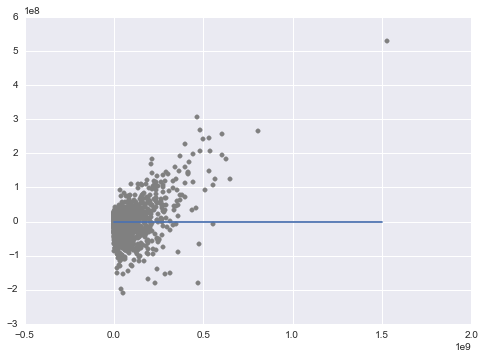

In [56]:
# plot residuals
predicted_gross = linmodel.predict(X)
residual = df_model['oversea_gross'] - predicted_gross
plt.scatter(df_model['oversea_gross'], residual, color='gray')
plt.plot([0,1.5e9],[0,0])

In [57]:
# calculate RMSE
mse = linmodel.mse_resid
rmse = np.sqrt(mse)
print '2 x Root Mean Squared Error = %g' % (2 * rmse)

2 x Root Mean Squared Error = 1.0877e+08


In [58]:
# Variable Transformation
def transform(df, transform, var_list):
    """
    apply certain transform on a list of variables in dataframe df
    """
    for v in var_list:
        new_v = transform + "_" + v
        if transform == 'log':
            df[new_v] = df[v].apply(lambda x: log(x))
        elif transform == 'sqrt':
            df[new_v] = df[v].apply(lambda x: sqrt(x))
        if transform == 'square':
            df[new_v] = df[v].apply(lambda x: x**2)
    
    return df

In [59]:
df = oversea.copy()
vars_to_transform = ['domestic_gross','production_budget']
df = transform(df,'log', vars_to_transform + ['oversea_gross'])
df = transform(df,'sqrt', vars_to_transform)
df = transform(df,'square', map(lambda x: 'log_'+x, vars_to_transform))
df.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,...,dummy_director_common_wolfgangpetersen,dummy_director_common_woodyallen,oversea_gross,log_domestic_gross,log_production_budget,log_oversea_gross,sqrt_domestic_gross,sqrt_production_budget,square_log_domestic_gross,square_log_production_budget
0,"10,000 B.C. (2008)",rolandemmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",...,0,0,175000000,18.367113,18.469471,18.980297,9735.717796,10246.950766,337.350851,341.121356
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,...,0,0,116654745,18.019562,18.258162,18.574729,8182.727296,9219.544457,324.704599,333.360473
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,...,0,0,15300000,17.457774,17.216708,16.543363,6178.848275,5477.225575,304.773885,296.415032
5,The 11th Hour (2007),None,707343,11thhour,15213,60853,NaN,None,2007-08-17,The 11th Hour,...,0,0,277864,13.469271,NaN,12.534887,841.036860,NaN,181.421261,NaN
6,127 Hours (2010),dannyboyle,18335230,127hours,2333,2136801,18000000,2010-11-05,2011-01-28,127 Hours,...,0,0,42403567,16.724335,16.705882,17.562743,4281.965670,4242.640687,279.703378,279.086504


In [60]:
# fit 3nd linear model (polynomial)
y_col = 'log_oversea_gross'
x_cols = ['domestic_gross','production_budget']

log_vars = filter(lambda x: (x.startswith('log_')) and (x != y_col), df.columns)
sqrt_vars = filter(lambda x: x.startswith('sqrt_'), df.columns)
square_log_vars = filter(lambda x: x.startswith('square_log_'), df.columns)

x_cols.extend(log_vars)
x_cols.extend(sqrt_vars)
x_cols.extend(square_log_vars)
x_cols.extend(dummy_cols)

df_model = df[x_cols + [y_col]].dropna()

Y = df_model[y_col] 
X = sm.add_constant(df_model[x_cols])
linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_oversea_gross   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2596.
Date:                Fri, 16 Oct 2015   Prob (F-statistic):               0.00
Time:                        13:16:53   Log-Likelihood:                -2041.2
No. Observations:                1426   AIC:                             4370.
Df Residuals:                    1282   BIC:                             5128.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
domestic_gross                                -1.66e-08   3.94e-09     -4.215      0.000     -2.43e-08 -8.88e-09
production_budget                             7.929e-10   8.54e-09      0.093      0.926      -1.6e-08  1.76e-08
log_domestic_gross                               2.5775      1.046      2.465      0.014         0.526     4.629
log_production_budget                           -0.8300      1.082     -0.767      0.443        -2.952     1.292
sqrt_domestic_gross                              0.0008      0.000      4.452      0.000         0.000     0.001
sqrt_production_budget                       -2.312e-05      0.000     -0.088      0.930        -0.001     0.000
square_log_domestic_gross                       -0.0954      0.040     -2.360      0.018        -0.175    -0.016
square_log_production_budget                     0.0381      0.044      0.872      0.383        -0.048     0.124
dummy_release_mth_2.0                           -0.0664      0.155     -0.429      0.668        -0.370     0.237
dummy_release_mth_3.0                           -0.3347      0.145     -2.309      0.021        -0.619    -0.050
dummy_release_mth_4.0                           -0.2273      0.146     -1.554      0.120        -0.514     0.060
dummy_release_mth_5.0                           -0.1020      0.159     -0.641      0.522        -0.414     0.210
dummy_release_mth_6.0                           -0.0459      0.146     -0.315      0.753        -0.332     0.240
dummy_release_mth_7.0                           -0.0784      0.149     -0.528      0.598        -0.370     0.213
dummy_release_mth_8.0                           -0.1712      0.146     -1.175      0.240        -0.457     0.115
dummy_release_mth_9.0                           -0.0809      0.150     -0.541      0.589        -0.375     0.213
dummy_release_mth_10.0                           0.0289      0.140      0.206      0.837        -0.247     0.305
dummy_release_mth_11.0                           0.0280      0.148      0.190      0.850        -0.262     0.318
dummy_release_mth_12.0                           0.0914      0.143      0.640      0.522        -0.189     0.371
dummy_director_common_alejandrogonzlezirritu     1.5017      1.074      1.398      0.162        -0.606     3.609
dummy_director_common_andrewdavis               -0.9761      0.760     -1.285      0.199        -2.466     0.514
dummy_director_common_andyfickman               -0.0759      0.620     -0.122      0.903        -1.293     1.141
dummy_director_common_andylanawachowski          0.3472      0.487      0.713      0.476        -0.608     1.302
dummy_director_common_andytennant                0.0490      0.483      0.102      0.919        -0.898     0.996
dummy_director_common_anglee    

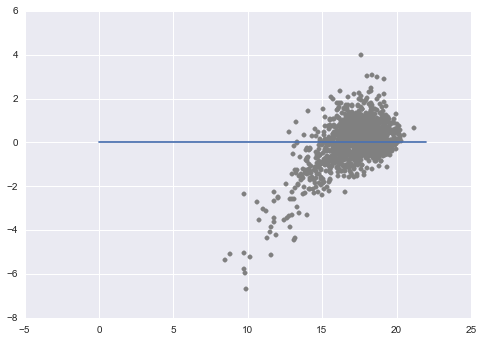

In [61]:
predicted_gross = linmodel.predict(X)
residual = df_model['log_oversea_gross'] - predicted_gross
plt.scatter(df_model['log_oversea_gross'], residual, color='gray')
plt.plot([0,22],[0,0])

In [62]:
mse = linmodel.mse_resid
rmse = np.sqrt(mse)
print '2 x Root Mean Squared Error = %g' % (2 * rmse)

2 x Root Mean Squared Error = 2.13587


In [87]:
## incorporate 2nd dataset from metacritic
movies2 = pd.read_csv("merged_data_v2.csv")
movies2.columns

Index([u'Unnamed: 0', u'Unnamed: 0_x', u'alt_title', u'director_x',
       u'domestic_gross', u'mojo_slug', u'opening_per_theater',
       u'opening_weekend_take', u'production_budget', u'release_date_wide',
       u'title', u'widest_release', u'worldwide_gross', u'year_x',
       u'Unnamed: 0_y', u'complete', u'director_y', u'genre',
       u'metacritic_page', u'metascore', u'num_critic_reviews',
       u'num_user_ratings', u'num_user_reviews', u'rating', u'release_date',
       u'runtime_minutes', u'studio', u'user_score', u'year_y'],
      dtype='object')

In [88]:
cols = ['title','genre','metascore','metacritic_page', 'num_critic_reviews',
       'num_user_ratings', 'num_user_reviews', 'rating', 'runtime_minutes','studio','user_score']
movies2 = movies2[cols]
movies2.head()

,title,genre,metascore,metacritic_page,num_critic_reviews,num_user_ratings,num_user_reviews,rating,runtime_minutes,studio,user_score
0,10 Things I Hate About You,"[Comedy, Romance]",70,/movie/10-things-i-hate-about-you,"[18, 7, 1, 26]",175,"[27, 1, 1, 29]",PG-13,97,Buena Vista Pictures,7.0
1,10 Years,"[Drama, Comedy, Romance]",61,/movie/10-years,"[7, 11, 0, 18]",12,"[3, 2, 1, 6]",R,100,Anchor Bay Entertainment,6.6
2,The 11th Hour,[Documentary],63,/movie/the-11th-hour,"[20, 9, 1, 30]",18,"[6, 1, 5, 12]",PG,95,Warner Independent Pictures (WIP),6.5
3,127 Hours,"[Adventure, Biography, Drama, Thriller]",82,/movie/127-hours,"[37, 1, 0, 38]",518,"[100, 2, 16, 118]",R,94,Fox Searchlight Pictures,8.0
4,12 Rounds,"[Action, Thriller, Crime]",38,/movie/12-rounds,"[1, 5, 7, 13]",66,"[3, 5, 12, 20]",PG-13,108,Fox Atomic,5.0


In [99]:
cols_to_merge = movies2.columns[movies2.dtypes!='O'].tolist()
print cols_to_merge

df = oversea.copy()
df = pd.merge(df, movies2[cols_to_merge+['title']].fillna(0), how='left', on=['title'])
df.head()

['metascore', 'num_user_ratings', 'runtime_minutes']


,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,...,dummy_director_common_walterhill,dummy_director_common_wernerherzog,dummy_director_common_wesanderson,dummy_director_common_wescraven,dummy_director_common_wolfgangpetersen,dummy_director_common_woodyallen,oversea_gross,metascore,num_user_ratings,runtime_minutes
0,"10,000 B.C. (2008)",rolandemmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",...,0,0,0,0,0,0,175000000,NaN,NaN,NaN
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,...,0,0,0,0,0,0,116654745,NaN,NaN,NaN
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,...,0,0,0,0,0,0,15300000,70,175,97
3,The 11th Hour (2007),None,707343,11thhour,15213,60853,NaN,None,2007-08-17,The 11th Hour,...,0,0,0,0,0,0,277864,63,18,95
4,127 Hours (2010),dannyboyle,18335230,127hours,2333,2136801,18000000,2010-11-05,2011-01-28,127 Hours,...,0,0,0,0,0,0,42403567,82,518,94


In [100]:
# fit 4th model: with new features
y_col = 'oversea_gross'
x_cols = ['domestic_gross','production_budget']
dummy_cols = filter(lambda x: x.startswith("dummy_"), df.columns)
x_cols.extend(dummy_cols)
x_cols.extend(cols_to_merge)

df_model = df[x_cols + [y_col]].dropna()

Y = df_model[y_col] 
X = sm.add_constant(df_model[x_cols])
linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          oversea_gross   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     44.02
Date:                Fri, 16 Oct 2015   Prob (F-statistic):               0.00
Time:                        14:47:58   Log-Likelihood:                -21391.
No. Observations:                1115   AIC:                         4.305e+04
Df Residuals:                     980   BIC:                         4.373e+04
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
domestic_gross                                   0.9973      0.033     30.062      0.000         0.932     1.062
production_budget                                0.6719      0.056     12.048      0.000         0.562     0.781
dummy_release_mth_2.0                        -7.622e+06   8.56e+06     -0.890      0.373     -2.44e+07  9.18e+06
dummy_release_mth_3.0                        -1.492e+07   8.13e+06     -1.835      0.067     -3.09e+07  1.04e+06
dummy_release_mth_4.0                          -3.9e+06   8.01e+06     -0.487      0.626     -1.96e+07  1.18e+07
dummy_release_mth_5.0                         2.069e+07   8.95e+06      2.311      0.021      3.12e+06  3.83e+07
dummy_release_mth_6.0                        -1.326e+07   8.09e+06     -1.639      0.102     -2.91e+07  2.62e+06
dummy_release_mth_7.0                        -1.181e+06    8.3e+06     -0.142      0.887     -1.75e+07  1.51e+07
dummy_release_mth_8.0                        -1.153e+07   8.06e+06     -1.431      0.153     -2.73e+07  4.28e+06
dummy_release_mth_9.0                        -8.935e+06   8.08e+06     -1.106      0.269     -2.48e+07  6.91e+06
dummy_release_mth_10.0                       -2.055e+06   7.45e+06     -0.276      0.783     -1.67e+07  1.26e+07
dummy_release_mth_11.0                       -6.255e+06   8.31e+06     -0.753      0.452     -2.26e+07  1.01e+07
dummy_release_mth_12.0                        1.855e+06   8.15e+06      0.228      0.820     -1.41e+07  1.78e+07
dummy_director_common_alejandrogonzlezirritu  4.089e+07   5.59e+07      0.732      0.464     -6.87e+07  1.51e+08
dummy_director_common_andrewdavis            -4.246e+07   3.95e+07     -1.075      0.283      -1.2e+08   3.5e+07
dummy_director_common_andyfickman            -8.469e+06   3.23e+07     -0.262      0.793     -7.18e+07  5.49e+07
dummy_director_common_andylanawachowski        2.89e+07   2.54e+07      1.138      0.255     -2.09e+07  7.87e+07
dummy_director_common_andytennant            -2.719e+07   2.82e+07     -0.965      0.335     -8.25e+07  2.81e+07
dummy_director_common_anglee                  5.238e+07   2.81e+07      1.865      0.062     -2.74e+06  1.07e+08
dummy_director_common_antoinefuqua            -5.45e+06   2.31e+07     -0.235      0.814     -5.09e+07     4e+07
dummy_director_common_barrylevinson           -4.27e+05   3.95e+07     -0.011      0.991     -7.79e+07  7.71e+07
dummy_director_common_bettythomas            -2.002e+07   3.23e+07     -0.621      0.535     -8.33e+07  4.33e+07
dummy_director_common_bradanderson           -5.398e-06   3.04e-05     -0.177      0.859     -6.51e-05  5.43e-05
dummy_director_common_brettratner            -5.998e+07   2.52e+07     -2.378      0.018     -1.09e+08 -1.05e+07
dummy_director_common_briandepal